1.

The tangent plane to the unit sphere: $$x^2 + y^2 + z^2 = 1 $$

We can take $ f(x,y,z)  = x^2 + y^2 + z^2 \Rightarrow  \nabla f = (2x, 2y, 2z) $

At any point $ (x_0, y_0, z_0) $, the tangent plane is given by:

$$ (x-x_0) 2x_0 + (y - y_0)2y_0 + (z - z_0)2z_0 = 0 $$
$$ xx_0 - (x_0)^2 + yy_0 - (y_0)^2 + zz_0 - (z_0)^2 = 0 $$
but $ (x_0)^2 + (y_0)^2 + (z_0)^2 = 1 $, because of the unit spehere, leaving us with:
$$ xx_0 + yy_0 + zz_0 = 1 $$

---

2.

Given $ f(x,y) = \frac{1}{2}(x^2 + by^2) \Rightarrow \nabla f(x,y) = (x, by) $

We replace $ \nabla f(x,y) $ in our initial equation: $ (x_{k+1}, y_{k+1}) = (x_k, y_k) - s_k \nabla f(x_k, y_k) \Rightarrow (x_{k+1}, y_{k+1}) = (x_k - s_kx_k, y_k-s_kby_k) $
We note with $\phi $: $$ \phi(s_k) = f(x_{k+1}, y_{k+1}) $$
Since $ \frac{d}{ds_k} \phi(s_k) = 0 $, this means that 
$$ 0 = -(x_k)^2 (x_k - s_kx_k) - b(y_k)^2(y_k-s_kby_k)$$
We move $ s_k $ to the other side, and we get:
$$ s_k = \frac{b^2 y_k^2 + x_k^2}{b^3 y_k^2 + x_k^2} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x, y, b):
    return 0.5*(x**2+b*y**2)

In [11]:
def df(x, y, b):
    return np.array([x, b*y])

In [35]:
def sk(x, y, b):
    if b**3 * y**2 + x**2 == 0:
        return 0.0
    return (b**2 * y**2 + x**2) / (b**3 * y**2 + x**2) 

In [5]:
b_val = [1, 2 ** -1, 5 ** -1, 10 ** -1]

In [27]:
plt.figure(figsize=(12,8))
x_values = np.linspace(-1.5, 1.5, 400)
y_values = np.linspace(-1.5, 1.5, 400)
x, y = np.meshgrid(x_values, y_values)

<Figure size 1200x800 with 0 Axes>

In [20]:
def gradient_descent(x, y, b, iterations=100):
    points = [(x,y)]
    for _ in range(iterations):
        grad = df(x,y,b)
        s_k = sk(x,y,b)
        x, y = x - s_k * grad[0], y - s_k * grad[1]
        points.append((x,y))
    return np.array(points)

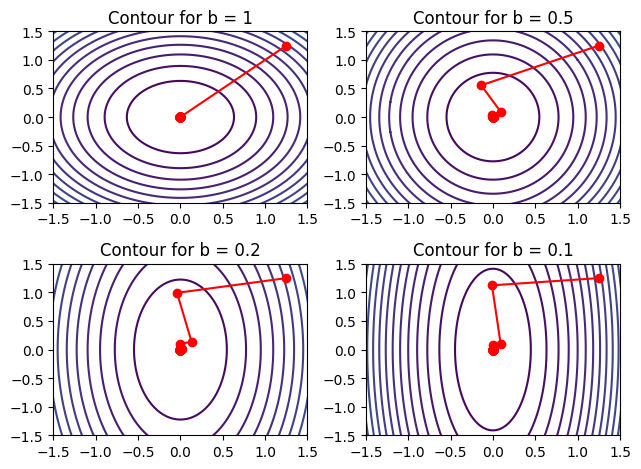

In [43]:
for i, b in enumerate(b_val, 1):
    z = f(x, y, b)

    x_start = 1.25
    y_start = 1.25

    points = gradient_descent(x_start,y_start,b)

    # 4 plots
    plt.subplot(2,2,i)
    plt.contour(x,y,z, levels=50)
    plt.plot(points[:, 0], points[:, 1], 'ro-')
    plt.title(f'Contour for b = {b}')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

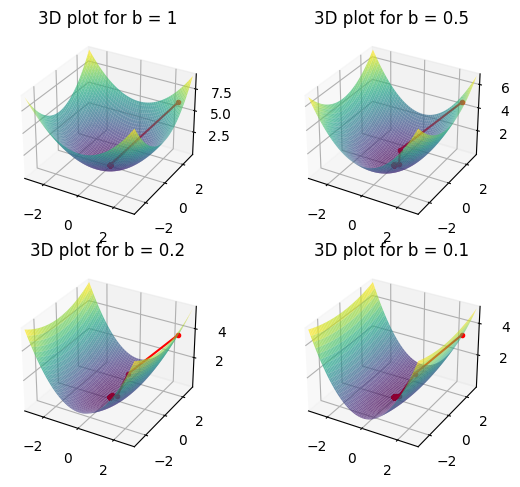

In [40]:
from mpl_toolkits.mplot3d import Axes3D

for i, b in enumerate(b_val, 1):
    ax = plt.subplot(2, 2, i, projection='3d')
    
    x, y = np.meshgrid(x_values, y_values)
    z = f(x, y, b)

    ax.plot_surface(x, y, z, cmap='viridis', alpha=0.7)

    x_start = 2.5 
    y_start = 2.5
    points = gradient_descent(x_start, y_start, b)
    
    z_points = f(points[:, 0], points[:, 1], b)
    ax.plot(points[:, 0], points[:, 1], z_points, 'r.-')
    
    ax.set_title(f'3D plot for b = {b}')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(z.min(), z.max())

plt.tight_layout()
plt.show()

As $ b $ gets smaller, we see that the GD takes more steps to reach the minimum point of the function